# Problem Statement: BMI Classification Based on Gender, Height, and Weight using Machine Learning

## Task1: Data Exploration and Cleanup 

## Task 2: Exploratory Data Analysis (EDA) 

## Task 3: Data Preprocessing

## Task 4: Model Training and Prediction 

## Task 5: Model Evaluation and Comparison 

## Task 6: Gender-Based Prediction Analysis 

# STEP 1: Data Exploration and Cleanup

In [28]:
# Importing libraries for data exploration and cleanup
import pandas as pd
#import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\achan\Desktop\Machine Learning Course materials\Assignments\Assignment-2\bmi.csv")

# Initial exploration
print('First 5 rows of the Dataset \n',df.head())
print(df.info())
print(df.describe())

First 5 rows of the Dataset 
    Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None
           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000


In [29]:
# Checking for missing values
print(df.isnull().sum())

Gender    0
Height    0
Weight    0
Index     0
dtype: int64


In [30]:
# Fill or drop missing values
df = df.dropna()  # Alternatively, you can use df.fillna() for imputation

# STEP 2: Exploratory Data Analysis

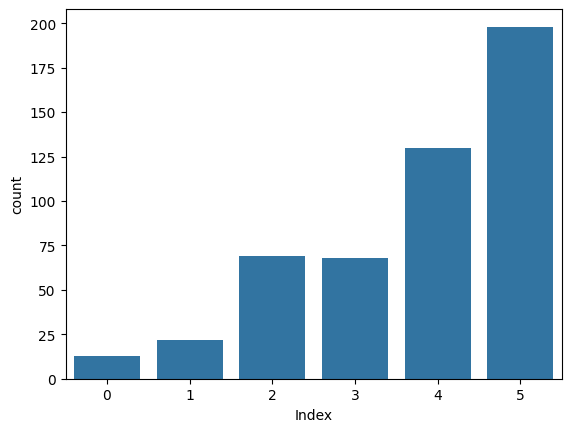

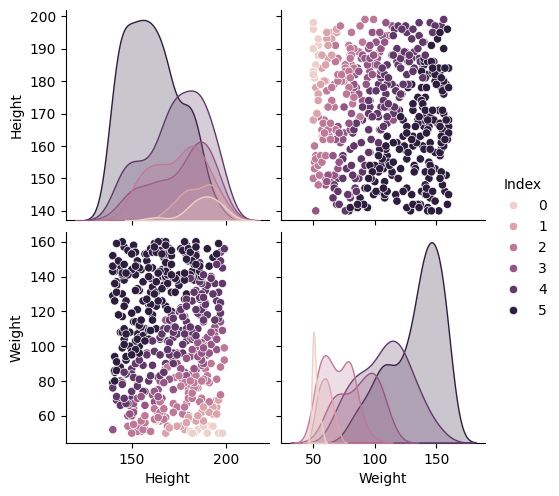

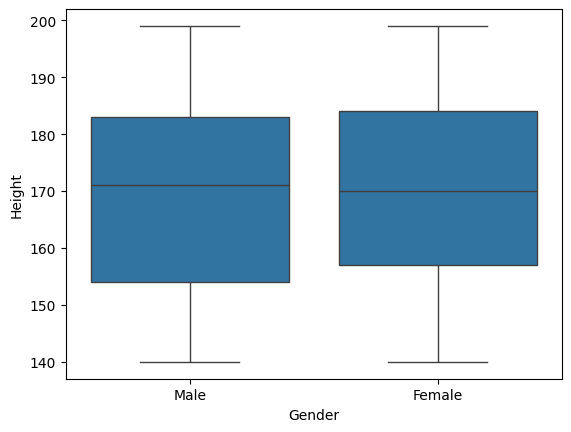

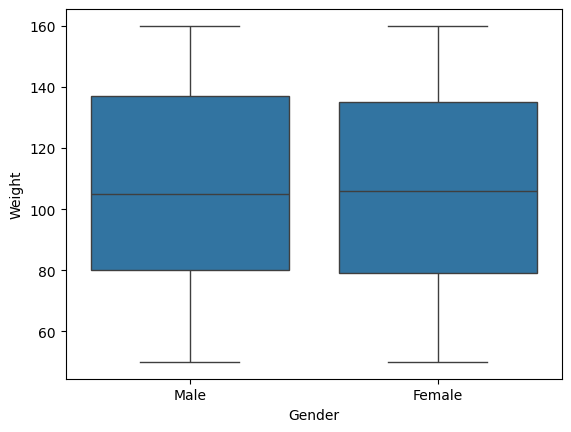

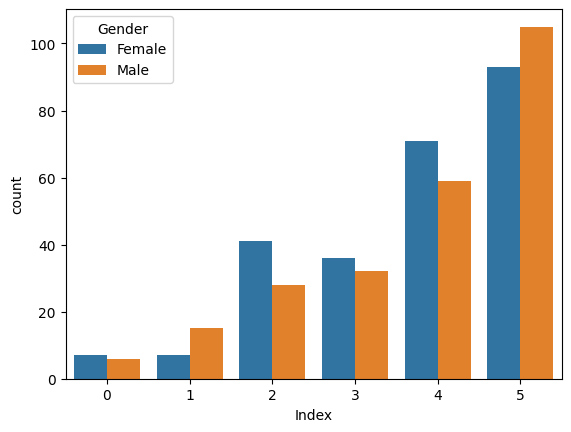

In [31]:
# Importing libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of BMI categories
sns.countplot(x='Index', data=df)
plt.show()

# Relationship between Height, Weight, and BMI Category
sns.pairplot(df, hue='Index')
plt.show()

# Gender-specific analysis
sns.boxplot(x='Gender', y='Height', data=df)
plt.show()

sns.boxplot(x='Gender', y='Weight', data=df)
plt.show()

sns.countplot(x='Index', hue='Gender', data=df)
plt.show()


# STEP 3: Data Preprocessing

In [32]:
# Importing libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Handling imbalanced data with SMOTE
X = df[['Gender', 'Height', 'Weight']]
y = df['Index']

# Convert categorical variable 'Gender' to numeric using .loc to avoid SettingWithCopyWarning
X.loc[:, 'Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})

# Apply SMOTE to balance the BMI categories
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalize/Standardize height and weight
scaler = StandardScaler()
X_resampled[['Height', 'Weight']] = scaler.fit_transform(X_resampled[['Height', 'Weight']])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# STEP 4: Model Training and Prediction

In [33]:
# Importing libraries for model training and prediction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


# STEP 5: Model Evaluation and Comparison

In [34]:
# Importing libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Function to evaluate models
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Logistic Regression Evaluation:")
evaluate_model(y_test, y_pred_log_reg)

print("SVM Evaluation:")
evaluate_model(y_test, y_pred_svm)

print("KNN Evaluation:")
evaluate_model(y_test, y_pred_knn)


Logistic Regression Evaluation:
Accuracy: 0.7941
Precision: 0.8018
Recall: 0.7941
F1 Score: 0.7958

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        43
           1       0.76      0.70      0.73        40
           2       0.77      0.73      0.75        41
           3       0.67      0.83      0.74        35
           4       0.85      0.81      0.83        42
           5       1.00      0.89      0.94        37

    accuracy                           0.79       238
   macro avg       0.80      0.80      0.80       238
weighted avg       0.80      0.79      0.80       238

SVM Evaluation:
Accuracy: 0.9034
Precision: 0.9101
Recall: 0.9034
F1 Score: 0.9039

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.89      1.00      0.94        40
           2       0.92      0.80      0.86        41
        

# STEP 6: Gender-Based Prediction Analysis

In [35]:
# Importing libraries for gender-based prediction analysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preprocessing function for gender-specific data
def preprocess_gender_data(df_gender):
    X_gender = df_gender[['Height', 'Weight']]
    y_gender = df_gender['Index']
    
    scaler = StandardScaler()
    X_gender = scaler.fit_transform(X_gender)
    
    X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X_gender, y_gender, test_size=0.2, random_state=42)
    
    return X_train_gender, X_test_gender, y_train_gender, y_test_gender

# Train and evaluate model for each gender
def train_and_evaluate_gender_model(df_gender, gender_name):
    X_train_gender, X_test_gender, y_train_gender, y_test_gender = preprocess_gender_data(df_gender)
    
    # Train Logistic Regression model
    log_reg_gender = LogisticRegression()
    log_reg_gender.fit(X_train_gender, y_train_gender)
    y_pred_log_reg_gender = log_reg_gender.predict(X_test_gender)
    
    print(f"Gender-Specific Logistic Regression Evaluation ({gender_name}):")
    evaluate_model(y_test_gender, y_pred_log_reg_gender)

# Function to evaluate models with zero_division parameter
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Filter data by gender
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

# Evaluate the model for male data
train_and_evaluate_gender_model(male_df, 'Male')

# Evaluate the model for female data
train_and_evaluate_gender_model(female_df, 'Female')


Gender-Specific Logistic Regression Evaluation (Male):
Accuracy: 0.7959
Precision: 0.7597
Recall: 0.7959
F1 Score: 0.7535

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.58      1.00      0.74         7
           3       1.00      0.56      0.71         9
           4       0.71      1.00      0.83        10
           5       1.00      1.00      1.00        17

    accuracy                           0.80        49
   macro avg       0.55      0.59      0.55        49
weighted avg       0.76      0.80      0.75        49

Gender-Specific Logistic Regression Evaluation (Female):
Accuracy: 0.8039
Precision: 0.8378
Recall: 0.8039
F1 Score: 0.7731

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.45      0.83      0.59         

The results from the BMI classification task using various machine learning models demonstrate notable performance differences across the models and gender-specific evaluations. The Support Vector Machine (SVM) outperformed the other models, achieving an accuracy of 90.34% with high precision, recall, and F1 scores across all BMI categories. The K-Nearest Neighbors (KNN) model also performed well with an accuracy of 89.50%, closely following SVM. Logistic Regression, while less accurate with an accuracy of 79.41%, still provided reasonably good results, particularly in terms of balanced precision and recall.

Gender-specific evaluations revealed some interesting patterns. The Logistic Regression model showed similar overall accuracy for both male and female subsets (around 80%). However, it struggled with certain BMI categories, especially for lower sample sizes. For instance, the precision and recall for BMI categories with minimal support were poor, leading to undefined metrics. This suggests that the model’s performance may benefit from additional fine-tuning or using more advanced techniques to handle small class sizes. Overall, while general models performed well, gender-specific models highlighted areas where predictive accuracy could be improved, particularly in handling imbalanced data within subgroups.